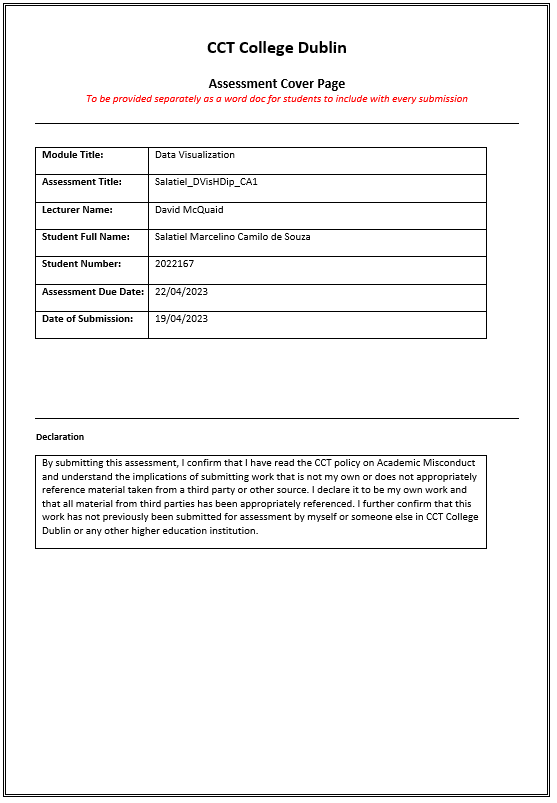

## SCENARIO:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in the upcoming Winter season.   
Each answer MUST have a separate visualization that can be easily understood and visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using Python.  
The company's CTO also requires you to rationalize all the decisions that you have made in your report.   
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.

# SUMMARY

- [LIBRARIES](#libraries)
- [DISPLAY DATASET](#display-dataset)
- [EXPLORATORY DATA](#exploratory-data)
- [DEALING WITH MISSING VALUES](#dealing-with-missing-values)
- [DEALING WITH OUTLIERS](#dealing-with-outliers)

## PART 1

- [QUESTION 1 - WHAT ARE THE TOP 5 "AVERAGE RATED" GAMES?](#q1)
- [QUESTION 2 - IS THERE A CORRELATION BETWEEN THE "USERS_RATED" AND THE "MAX_PLAYTIME"?](#q2)
- [QUESTION 3 - WHAT IS THE DISTRIBUTION OF GAME CATEGORIES?](#q3)
- [QUESTION 4 - DO OLDER GAMES (1992 AND EARLIER) HAVE A HIGHER MEAN "AVERAGE RATING" THAN NEWER GAMES (AFTER 1992)?](#q4)
- [QUESTION 5 - WHAT ARE THE 3 MOST COMMON "MECHANICS" IN THE DATASET?](#q5)

## PART 2

- [QUESTION 6 - WHAT INSIGHTS CAN WE HAVE FROM THE CORRELATION BETWEEN THE YEAR OF PUBLISHMENT AND AVERAGE RATING?](#q6)
- [QUESTION 7 - WHAT INSIGHTS CAN WE GET BY ANALYSING THE MAX PLAYTIME E AVERAGE RATING?](#q7)

## DICTIONARY

- game_id: Unique game identifier
- description: A paragraph of text describing the game
- image: URL image of the game
- max_players: Maximum recommended players
- max_playtime: Max recommended playtime (min)
- min_age: Minimum recommended age
- min_players: Minimum recommended players
- min_playtime: Minumum recommended playtime (min)
- name: Name of the game
- playing_time: Average playtime
- thumbnail: URL thumbnail of the game
- year_published: Year game was published
- artist: Artist for game art
- category: Categories for the game (separated by commas)
- compilation: If part of a multi-compilation - name of a compilation
- designer: Game designer
- expansion: If there is an expansion pack - name of expansion
- family: Game mechanic - how game is played, separated by comma
- publisher - Company/person who published the game, separated by comma
- average_rating: Average rating on Board Games Geek (1-10)
- users_rated: Number of users that rated the game

<a id='libraries'></a>
## LIBRARIES

For this analysis, only Pandas and Numpy will be used for the mathematical components. Seaborn and Matplotlib will support the analysis to display the information extracted from the dataset.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np


# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Hide the warnings
np.warnings.filterwarnings('ignore')

Reading the data head and tail simultaneously to have a better idea of the variables contained.

<a id='display-dataset'></a>
## DISPLAY DATASET

In [2]:
# Calling the csv
df = pd.read_csv('board_games.csv')

#Display csv file
df

game_id                                        description  \
0            1  Die Macher is a game about seven sequential po...   
1            2  Dragonmaster is a trick-taking card game based...   
2            3  Part of the Knizia tile-laying trilogy, Samura...   
3            4  When you see the triangular box and the luxuri...   
4            5  In Acquire, each player strategically invests ...   
...        ...                                                ...   
10527   214996  Description from the publisher:&#10;&#10;Silve...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10529   215471  Time to walk about town and take some pictures...   
10530   216201  The race is on for the robots of the Robo Rall...   
10531   216725  The deluxe edition comes in a double tall box ...   

                                              image  max_players  \
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
1       //cf.geekdo-images.com/images/pic184174.jpg            4   
2      //cf.geekdo-images.com/images/pic3211873.jpg            4   
3       //cf.geekdo-images.com/images/pic285299.jpg            4   
4       //cf.geekdo-images.com/images/pic342163.jpg            6   
...                                             ...          ...   
10527  //cf.geekdo-images.com/images/pic3093082.png            2   
10528  //cf.geekdo-images.com/images/pic3290122.jpg            5   
10529  //cf.geekdo-images.com/images/pic3290975.png            4   
10530  //cf.geekdo-images.com/images/pic3374227.jpg            6   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   

       max_playtime  min_age  min_players  min_playtime  \
0               240       14            3           240   
1                30       12            3            30   
2                60       10            2            30   
3                60       12            2            60   
4                90       12            3            90   
...             ...      ...          ...           ...   
10527           480       12            1            30   
10528            45       13            2            45   
10529            20       12            2            20   
10530           120       12            2            20   
10531            60       14            1            30   

                                                    name  playing_time  ...  \
0                                             Die Macher           240  ...   
1                                           Dragonmaster            30  ...   
2                                                Samurai            60  ...   
3                                         Tal der Könige            60  ...   
4                                                Acquire            90  ...   
...                                                  ...           ...  ...   
10527  Silver Bayonet: The First Team in Vietnam, 196...           480  ...   
10528               Codex: Card-Time Strategy – Core Set            45  ...   
10529                                     Wind the Film!            20  ...   
10530                                  Robo Rally (2016)           120  ...   
10531    Villages of Valeria: Deluxe Kickstarter Edition            60  ...   

                            artist  \
0              Marcus Gschwendtner   
1                       Bob Pepper   
2                  Franz Vohwinkel   
3                              NaN   
4      Scott Okumura,Peter Whitley   
...                            ...   
10527               Charles Kibler   
10528                          NaN   
10529       宝井 貴子 (Takako Takarai)   
10530                          NaN   
10531         Mihajlo Dimitrievski   

                                          category  \
0                   Economic,Negotiation,Political   
1                                Card Game,Fantasy   
2                       Abstract Strategy,Medieval   
3                             

<a id='exploratory-data'></a>
## EXPLORATORY DATA

In the exploratory data process, the method info is called to check the content of each row. If integer, object or float.

In [3]:
# Displaying method info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

The "describe" method, in a simple and quick way, is a set of descriptive statistics of these two variables: the number of values, the average, the standard deviation, the minimum value, the quartiles of the distribution and the maximum value.

In [4]:
# Displaying method describe
df.describe().T

count          mean           std         min          25%  \
game_id         10532.0  62059.203095  66223.716828     1.00000  5444.500000   
max_players     10532.0      5.657330     18.884403     0.00000     4.000000   
max_playtime    10532.0     91.341436    659.754400     0.00000    30.000000   
min_age         10532.0      9.714964      3.451226     0.00000     8.000000   
min_players     10532.0      2.070547      0.664394     0.00000     2.000000   
min_playtime    10532.0     80.882738    637.873893     0.00000    25.000000   
playing_time    10532.0     91.341436    659.754400     0.00000    30.000000   
year_published  10532.0   2003.070832     12.278296  1950.00000  1998.000000   
average_rating  10532.0      6.370856      0.850364     1.38421     5.829585   
users_rated     10532.0    870.081466   2880.214998    50.00000    85.000000   

                         50%            75%           max  
game_id         28822.500000  126409.500000  216725.00000  
max_players         4.000000       6.000000     999.00000  
max_playtime       45.000000      90.000000   60000.00000  
min_age            10.000000      12.000000      42.00000  
min_players         2.000000       2.000000       9.00000  
min_playtime       45.000000      90.000000   60000.00000  
playing_time       45.000000      90.000000   60000.00000  
year_published   2007.000000    2012.000000    2016.00000  
average_rating      6.392965       6.942675       9.00392  
users_rated       176.000000     518.000000   67655.00000

The "isnull(). sum()" method returns the number of missing values for each column. This will be significantly important for the analyses to know and understand the missing values along the analysis process.

In [5]:
# Finding missing values
df.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

<a id='dealing-with-missing-values'></a>
## DEALING WITH MISSING VALUES

It's important to enphasize that this is a visualization analyses, therephore, there will be no drops or ajusts, once that machine learning models won't be included in this process. At the end, more or less useless information will make no difference in the analysi, once they will make no difference in the accuracy, precision or final results of the graphs displayed.  

Starting by installing "missingno", this method will enable the plot of the missing value columns and have a better understanding of them.

In [6]:
# Installing missingno
!pip install missingno

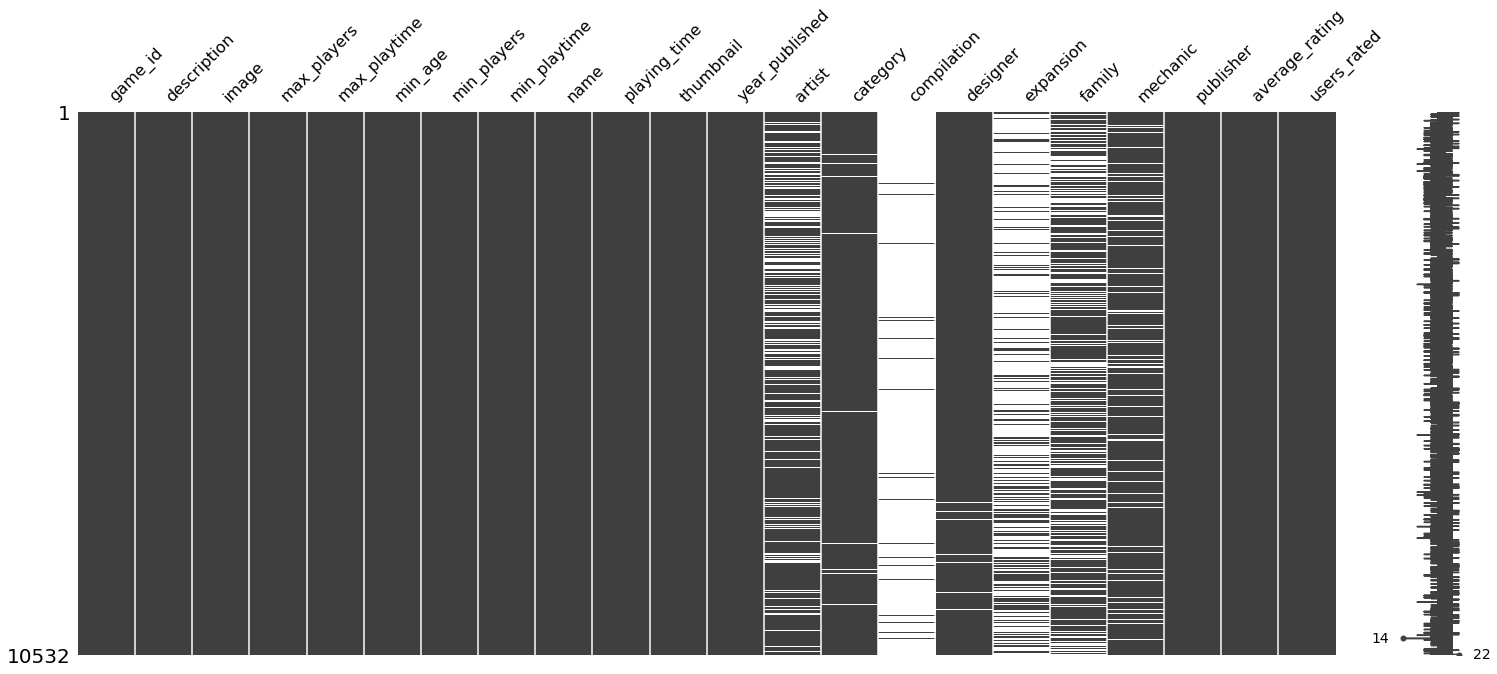

In [7]:
# Importing missingno library
import missingno as msno

# Display graph
msno.matrix(df);

Above it's possible to see some of the columns disturbing the lines due to their high number of missing values. To make it better, the following graph will display the columns with missing values properly to identify which ones are and how many of these values they carry.

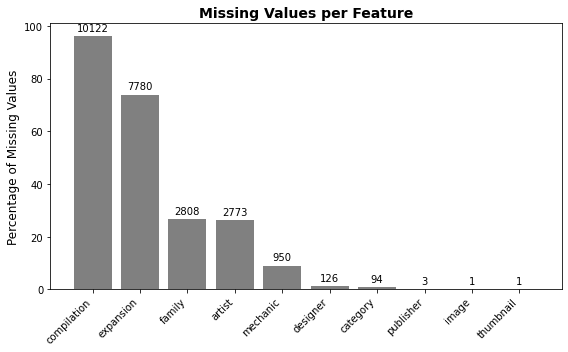

In [8]:
# Selecting the features with missing values and order by asceding and descending values
cols_with_na = df.columns[df.isna().any()]
missing_count = df[cols_with_na].isnull().sum().sort_values(ascending=False)

# Calculating the percetn of the missing values per feature
missing_percentage = (missing_count / len(df)) * 100

# Ploting the graph
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(missing_count.index, missing_percentage, color='grey')

# Setting up the graph details
ax.set_title('Missing Values per Feature', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage of Missing Values', fontsize=12)
ax.set_xticklabels(missing_count.index, rotation=45, ha='right', fontsize=10)

# Adding the value of each bar in the graph
for i, bar in enumerate(bars):
    ax.annotate(str(missing_count[i]), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Ajusting the position of the graph
plt.tight_layout()

# Display graph
plt.show()

According to the bar chart above, it's possible to notice a high percentage of missing values in the features "compilation" and "expansion", and how much their quantity is discrepant from the others. The expansion is when game the publishers create different ways to make more out of the board game, like new maps, new characters, new equipment cards and rules. Not all games have expansions, and less yet compilations, which would be all the expansions of a game in only one pack. This explains the reason for such a high number of missing values in those 2 features. An expansion can keep the game alive after players finish the campaign or the objectives, leveraging sales and maintaining the hype. A good example of that is the game The Settlers of Catan, which sold over 32 million copies and has an expansion and compilation, according to an article by [The New Yorker](https://www.newyorker.com/business/currency/the-man-who-built-catan).

<a id='dealing-with-outliers'></a>
## DEALING WITH OUTLIERS

As already mentioned, no data from this dataset will be treated and outliers will not be different. However, it is important to understand the relationship between the numeric columns and how they behave so that you have an idea of the distribution of values and how contrasting they are. For this, the "df_numerical" variable will be created so that the numerical columns can be separated, and then it will be applied the boxplot method to visualize the distribution of its values in a broad and generalized way. The choice for the boxplot is simple, it shows the quartiles, the extremities and the high concentration of the values just for visualization without knowing the exact numbers.

In [9]:
# Separating numerical features to analyse outliers
df_numerical = df.select_dtypes(exclude='object')

# Calling df_numerical
df_numerical

game_id  max_players  max_playtime  min_age  min_players  min_playtime  \
0            1            5           240       14            3           240   
1            2            4            30       12            3            30   
2            3            4            60       10            2            30   
3            4            4            60       12            2            60   
4            5            6            90       12            3            90   
...        ...          ...           ...      ...          ...           ...   
10527   214996            2           480       12            1            30   
10528   215437            5            45       13            2            45   
10529   215471            4            20       12            2            20   
10530   216201            6           120       12            2            20   
10531   216725            5            60       14            1            30   

       playing_time  year_published  average_rating  users_rated  
0               240            1986         7.66508         4498  
1                30            1981         6.60815          478  
2                60            1998         7.44119        12019  
3                60            1992         6.60675          314  
4                90            1964         7.35830        15195  
...             ...             ...             ...          ...  
10527           480            2016         8.35333           75  
10528            45            2016         8.08780           82  
10529            20            2016         7.28016           63  
10530           120            2016         7.45871          341  
10531            60            2016         7.52941          119  

[10532 rows x 10 columns]

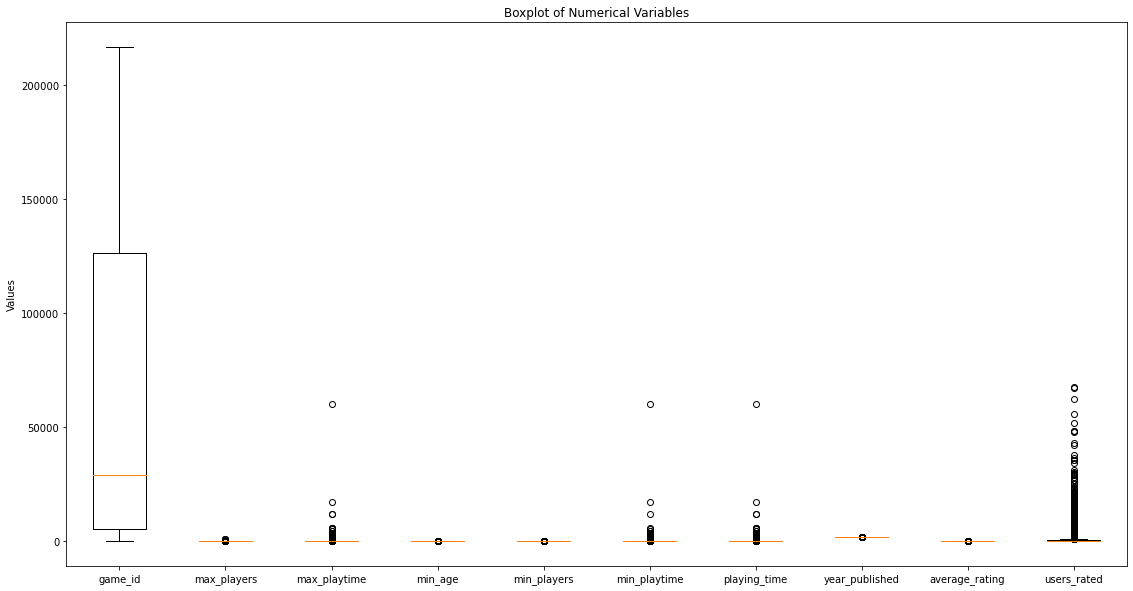

In [10]:
# Setting the boxplot
fig, ax = plt.subplots(figsize=(19, 10))
ax.boxplot(df_numerical.values, labels=df_numerical.columns)
ax.set_title('Boxplot of Numerical Variables')
ax.set_ylabel('Values')

# Display boxplot
plt.show()

From this boxplot, it's possible to notice a that a few interesting factors:

- There was no game with more than 10k users rating it.
- The features 'max_players', 'min_age', 'min_players', and 'average rating' have low values due to being related only to the number of players, min/max players per game and average rating, which does not go far than 10.
- The features related to time are extremely similar to each other.

Due to this short analysis just by looking at the plot, the 3 features related to time will be plotted below to be seen side by side and followed by a heatmap to show their correlation.

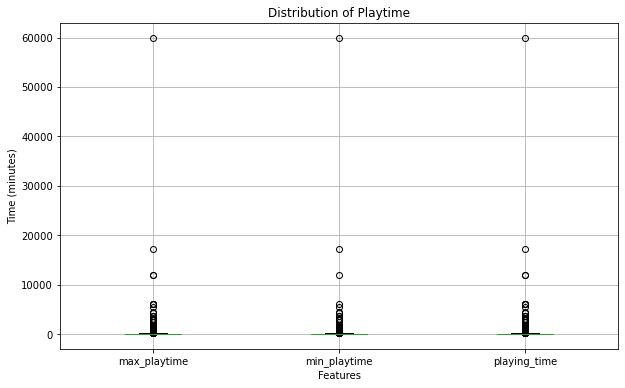

In [11]:
# Selecting only the features of interest
df_boxplot = df[['max_playtime', 'min_playtime', 'playing_time']]

# Creating the boxplot
plt.figure(figsize=(10,6))
boxplot = df_boxplot.boxplot()

# Adding names to the columns of the axis x
boxplot.set_xticklabels(['max_playtime', 'min_playtime', 'playing_time'])

# Adding tittles and labels
plt.title('Distribution of Playtime')
plt.xlabel('Features')
plt.ylabel('Time (minutes)')

# Display graph
plt.show()

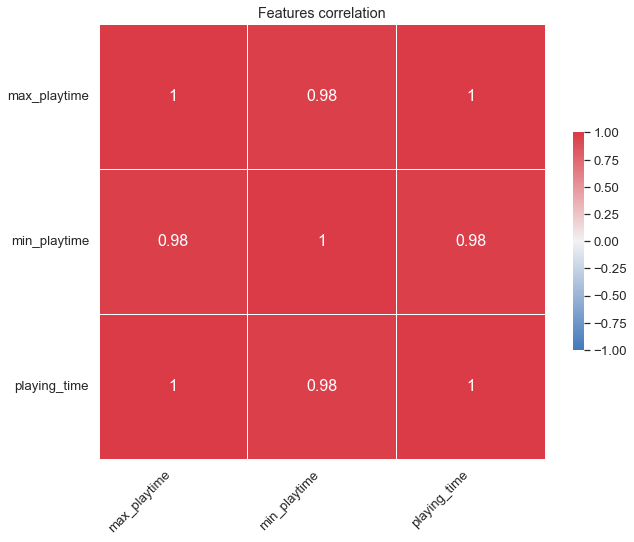

In [12]:
# Creating the correlation matrix
corr_matrix = df_boxplot.corr()

# Defining scale of colours and size of the heatmap
sns.set(rc={'figure.figsize':(10, 8)})
sns.set(font_scale=1.2)
sns.set_style("white")
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Creating heatmap with customized colours and bigger labels
sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, annot_kws={"fontsize":16}, cbar_kws={"shrink": .5})

# Ajusting position labels position
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')

# Adding tittle
plt.title('Features correlation')

# Display graph
plt.show()

Exploring the data which is being analysed to scrutinize every single detail is important to be aware of the variances and scenarios and that the data finds itself. Using the library Seaborn it allows Python to display a matrix correlation or heatmap to verify one of these crucial details for the analysis process. As far as the variable places itself at 1, it means that the correlation between them is high. In this case, they're 0.98. Reaching nearly 100% of similarity. The colours are usually different according to contrasting the values, but 0.98 and 1 are quite close to each other, which makes  - according to the subtitle on the right - almost the same colours.

As the playtime attracted attention for having 3 correlated features, an interesting question to be made is, what is the game with the longest campaign to be completed? Bellow, it will possible to see the list of them. They're not between the most played ones but are so far the longest time ever produced.

In [13]:
# Selecting the largest playingtime game
top5_playing_time = df.nlargest(5, 'playing_time')[['name', 'playing_time']]

# Printing top 5 playingtime game
print(top5_playing_time)

                               name  playing_time
2449  The Campaign for North Africa         60000
6293     1914: Offensive à outrance         17280
206                 Empires in Arms         12000
3029              Drang Nach Osten!         12000
993                 World in Flames          6000


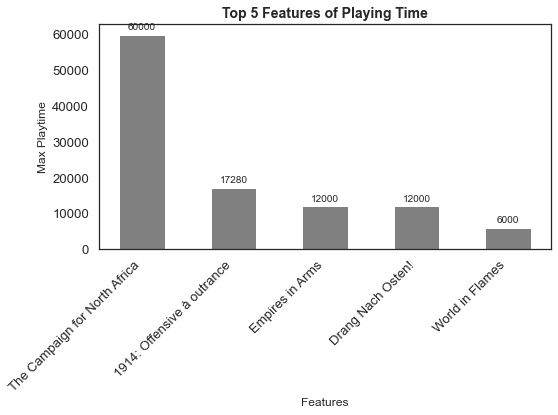

In [14]:
# Selecting top 5 features of max_playtime
top_max_playtime = df.nlargest(5, 'playing_time')

# Creating the bar plot
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(top_max_playtime['name'], top_max_playtime['playing_time'], color='grey', width=0.5, align='center')
plt.xticks(rotation=45, ha='right')

# Ajusting graph setup
ax.set_title('Top 5 Features of Playing Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Max Playtime', fontsize=12)

# Adding values to each bar
for i, bar in enumerate(bars):
    ax.annotate(str(top_max_playtime.iloc[i]['playing_time']), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Adjusting graph position
plt.tight_layout()

# Display graph
plt.show()

According to [The Board Game Geek](https://boardgamegeek.com/boardgame/4815/campaign-north-africa-desert-war-1940-43), The Campaign for North Africa has been called the longest board game ever produced, with estimates that a full game would take 1,500 hours to complete.

# PART 1

<a id='q1'></a>
# QUESTION 1
## WHAT ARE THE TOP 5 “AVERAGE RATED” GAMES?

## Method 1 (only average_rating feature)

There are 2 different ways to answer this question. If it's to take only the top 5 in the feature "average_rating" it will involve a simple process. Firstly, the top 5 will be separated into a variable called "top5_average_rating" and sorted the first 5 values more frequently. After this, a Matplotlib bar chart will be displayed to show the results. 

In [15]:
# Sorting value of the top 5 average rating features
top5_average_rating = df.sort_values('average_rating', ascending = False)
df_top5_average_rating = top5_average_rating.head(5)

# Calling the df_top5_average_rating
df_top5_average_rating

game_id                                        description  \
8348   140135  Small World's Designer Edition is a spare-no-e...   
6392    55690  Kingdom Death: Monster is a fully cooperative ...   
9964   181289  Terra Mystica: Big Box, a Korean crowdfunding ...   
8526   144574  (from MMP website:)&#10;&#10;Last Chance for V...   
9675   173504  The Greatest Day: Sword, Juno, and Gold Beache...   

                                             image  max_players  max_playtime  \
8348  //cf.geekdo-images.com/images/pic2270432.jpg            6            80   
6392  //cf.geekdo-images.com/images/pic2931007.jpg            6           180   
9964  //cf.geekdo-images.com/images/pic2602334.jpg            5           150   
8526  //cf.geekdo-images.com/images/pic1875530.jpg            2            60   
9675  //cf.geekdo-images.com/images/pic2422496.jpg            8          6000   

      min_age  min_players  min_playtime  \
8348        8            2            40   
6392       17            1            60   
9964       12            2            60   
8526       15            2            60   
9675       12            2            60   

                                                 name  playing_time  ...  \
8348                     Small World Designer Edition            80  ...   
6392                           Kingdom Death: Monster           180  ...   
9964                           Terra Mystica: Big Box           150  ...   
8526                          Last Chance for Victory            60  ...   
9675  The Greatest Day: Sword, Juno, and Gold Beaches          6000  ...   

                               artist  \
8348   Miguel Coimbra,Cyrille Daujean   
6392         Lokman Lam,Lorinda Tomko   
9964                  Dennis Lohausen   
8526  Dean Essig,Gettysburg Cyclorama   
9675                   Nicolás Eskubi   

                                               category  \
8348            Civilization,Fantasy,Territory Building   
6392  Adventure,Fantasy,Horror,Mature / Adult,Miniat...   
9964   Civilization,Economic,Fantasy,Territory Building   
8526               American Civil War,Civil War,Wargame   
9675                               Wargame,World War II   

                                            compilation  \
8348  Small World,Small World: 6 Player Board,Small ...   
6392                                                NaN   
9964            Terra Mystica,Terra Mystica: Fire & Ice   
8526                                                NaN   
9675                                                NaN   

                             designer  \
8348                Philippe Keyaerts   
6392                       Adam Poots   
9964  Jens Drögemüller,Helge Ostertag   
8526                       Dean Essig   
9675                Adam Starkweather   

                                              expansion  \
8348                                                NaN   
6392  Kingdom Death: Monster – A Strange Spot and Be...   
9964                                                NaN   
8526                                                NaN   
9675                                                NaN   

                                                 family  \
8348              Crowdfunding: Kickstarter,Small World   
6392  Campaign Games,Crowdfunding: Kickstarter,Kingd...   
9964                                      Terra Mystica   
8526                              Line of Battle Series   
9675                              Grand Tactical Series   

                                               mechanic  \
8348  Area Control / Area Influence,Area Movement,Di...   
6392  Co-operative Play,Dice Rolling,Grid Movement,R...   
9964      Route/Network Building,Variable Player Powers   
8526                       Dice Rolling,Hex-and-Counter   
9675                                   Chit-Pull System   

                                        publisher average_rating users_rated  
8348                               Days 

Below, the barplot was chosen because it shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value and in this case, each bar will be representing the value of the average rating given by the dataset in a descending variation. The colours were selected specifically selected to give the impression of slowly fading away as the rate goes down, looking like losing strength and consistency.

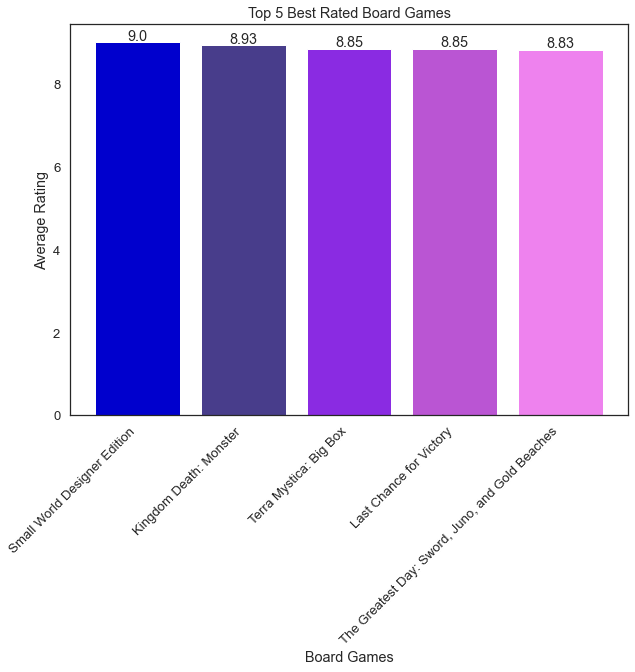

In [16]:
# Setting the barplot
plt.bar(df_top5_average_rating['name'], df_top5_average_rating['average_rating'], color=['mediumblue', 'darkslateblue', 'blueviolet', 'mediumorchid', 'violet'])
plt.xlabel('Board Games')
plt.ylabel('Average Rating')
plt.title('Top 5 Best Rated Board Games')

# Adding the values on the top
for i, value in enumerate(df_top5_average_rating['average_rating']):
    plt.text(i, value + 0.05, str(round(value, 2)), ha='center')

# Setting the subtitles on the bottom    
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

#Display graph
plt.show()

The barplot shows us the difference between the top 5, however, due to the scale of 0 - 9, it can be a little bit complicated to see the difference between them, that's why the usage of colours to differentiate each one.
In the next plot, a Matplotlib lollipop was selected. The reason for the choice is that it makes the visualization clear than in the bar chart, with a line to link them all on the tops and increased the scale, making it closer to analysing and showing the difference between each game. Even if the difference between them is less than 1 point on the rating scale, this can make all difference in the sales by the users' chosen option.

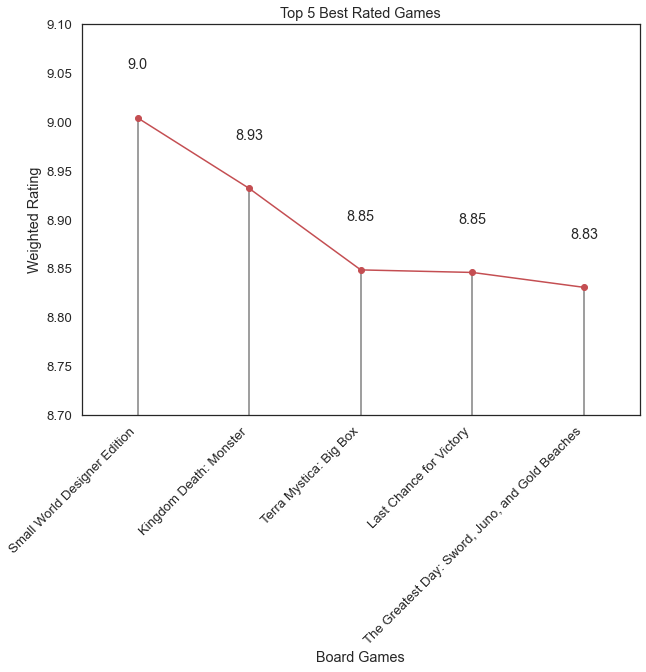

In [17]:
# Setting the lolipop graph
plt.stem(df_top5_average_rating['name'], df_top5_average_rating['average_rating'], linefmt='gray', markerfmt='oC3', basefmt='gray')
plt.plot(df_top5_average_rating['name'], df_top5_average_rating['average_rating'], 'C3')

# Adding the subtitles on the bottom
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

# Adding the labels
plt.xlabel('Board Games')
plt.ylabel('Weighted Rating')
plt.title('Top 5 Best Rated Games')

# Adding the values on the top
for i, value in enumerate(df_top5_average_rating['average_rating']):
    plt.text(i, value + 0.05, str(round(value, 2)), ha='center')

# Adjusting the margins
plt.xlim(-0.5, 4.5)
plt.ylim(8.7, 9.1)
plt.margins(0.1, None)

#Display graph
plt.show()

## Method 2 (The mean of the average_rating with users_rated)

The dataset shows the feature of average rating but also another feature besides as significant as the first, which is the users rated. The quantity of users who rated the game is also important as through this it will be possible to weight the importance level of that rate according to the number of users. For example, let's say that 100 users rated game X as 8.1, and another 5000 gave the same score to game Y. So in the end, the game Y presented a heavier weight according to these weighting measures. So this is what will be done in Method 2, creating the variable weighted rating to measure the weight of each game by getting the mean of the feature average rating and users rating. The option for the mean is simple. The Median couldn't be used as the differences between the two features are too high. One goes until 10, while the other goes over 60000.

In [18]:
# Getting the mean of the 2 features and defining a valiable for the new df called df_top5
df['weighted_rating'] = df[['average_rating', 'users_rated']].mean(axis=1)
df_top5 = df.sort_values('weighted_rating', ascending=False)

Important to remember that the method changes, but the structure of the graphs displayed will remain uniform, as previously in Method 1.

In [19]:
# Printing the df_top5
top5 = df_top5.head(5)
print(top5[['name', 'average_rating', 'users_rated', 'weighted_rating']])

             name  average_rating  users_rated  weighted_rating
12          Catan         7.26569        67655     33831.132845
617   Carcassonne         7.43536        67056     33531.717680
5368     Pandemic         7.67234        62377     31192.336170
5737     Dominion         7.69995        55930     27968.849975
6720    7 Wonders         7.83595        51688     25847.917975


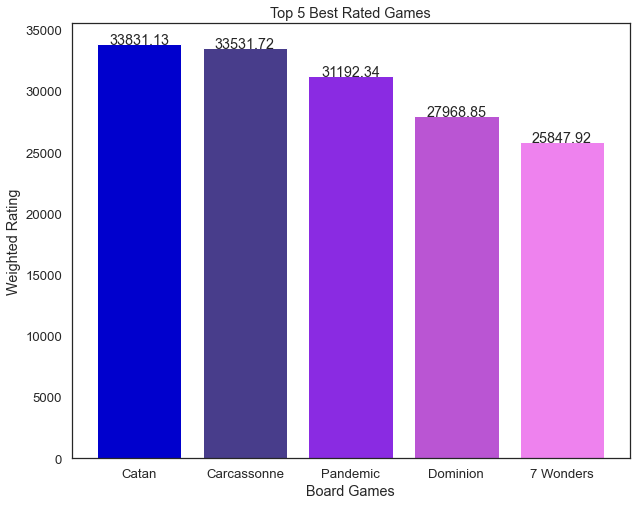

In [20]:
# Setting the barplot
plt.bar(top5['name'], top5['weighted_rating'], color=['mediumblue', 'darkslateblue', 'blueviolet', 'mediumorchid', 'violet'])
plt.xlabel('Board Games')
plt.ylabel('Weighted Rating')
plt.title('Top 5 Best Rated Games')

# Adding the values on the top
for i, value in enumerate(top5['weighted_rating']):
    plt.text(i, value + 0.05, str(round(value, 2)), ha='center')
    
# Display graph
plt.show()

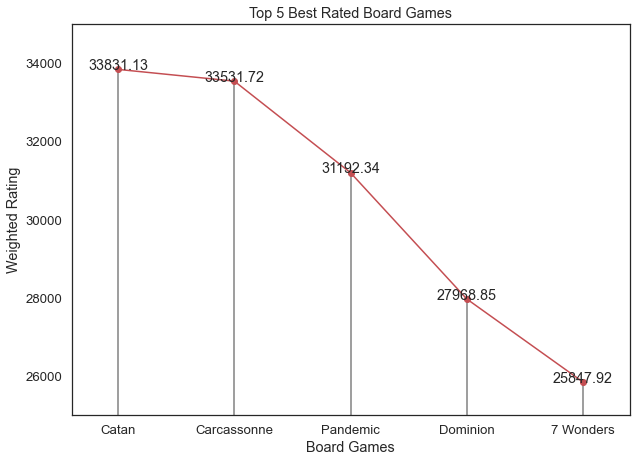

In [21]:
# Setting lolipop graph
plt.stem(top5['name'], top5['weighted_rating'], linefmt='gray', markerfmt='oC3', basefmt='gray')
plt.plot(top5['name'], top5['weighted_rating'], 'C3')
plt.subplots_adjust(bottom=0.2)

# Adding the labels
plt.xlabel('Board Games')
plt.ylabel('Weighted Rating')
plt.title('Top 5 Best Rated Board Games')

# Adding the values on the top
for i, value in enumerate(top5['weighted_rating']):
    plt.text(i, value + 0.05, str(round(value, 2)), ha='center')

# Adjusting the margins
plt.margins(0.1, None)
plt.ylim(25000, 35000)

# Display graph
plt.show()

After this analysis, it was possible to notice that the results changed and not only in a few decimals but drastically according to the weighted scale. Method 2 might be the most accurate to measure it, as it takes in fact the number of users who rated the games. According to [The Board Game Geek](https://boardgamegeek.com/browse/boardgame?sort=numvoters&sortdir=desc), Catan is in the second position in the number of users rated, losing only to Carcassonne, published in 2000.

<a id='q2'></a>
# QUESTION 2
## IS THERE A CORRELATION BETWEEN THE “USERS_RATED” AND THE “MAX_PLAYTIME”?  

When this question is read, the first question that comes to mind is, how long do users need to play to rate the games? And does this time play influence their rate? And that is the main point to be responded bellow. If it was just to check the correlation through a matrix correlation (heatmap), it'd be possible to find out that there's no such significant correlation between those two, as shown in the matrix below.

In [22]:
# Finding correlation between the 2 features and printing it
correlation = df['max_playtime'].corr(df['users_rated'])

# Printing the correlation
print(correlation)

-0.00434164733377671


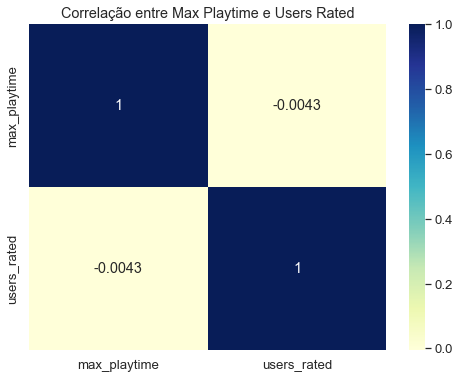

In [23]:
# Ploting a matrix correlation graph
matriz_corr = df[['max_playtime', 'users_rated']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='YlGnBu')

# Setting the title
plt.title('Correlação entre Max Playtime e Users Rated')

# Display graph
plt.show()

As it wasn't possible to see much in the matrix correlation map, a Matplotlib scatterplot will be displayed below to check how these 2 features behave in distribution and have a better understanding of why their correlation is so low.

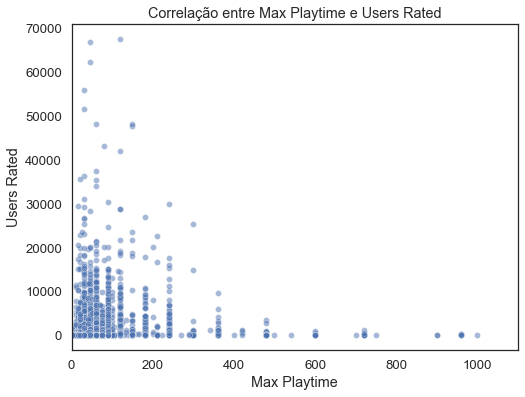

In [24]:
# Plotting a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='max_playtime', y='users_rated', data=df, alpha=0.5)

# Setting the labels
plt.title('Correlação entre Max Playtime e Users Rated')
plt.xlabel('Max Playtime')
plt.ylabel('Users Rated')

# Setting the margins
plt.xlim(0, 1100)

# Display graph
plt.show()

Considering each point is a game, it's notorious that the great majority of the users did not need to play more than 200 minutes to decide their score in the games. And even taking a look at the users who played over 300 minutes, it's possible to realise that their rate wasn't related to how long they played the game, but other factors. 

<a id='q3'></a>
# QUESTION 3
## WHAT IS THE DISTRIBUTION OF GAME CATEGORIES? 

This question is pertinent and quite ambiguous if analysed from different points of view.

On one side, there are the games, all of them with different categories inside the 'category' feature and some of the games with up to 5 different categories in the same row (METHOD 1). On the other side, this can be seen as games with categories altogether. This means that a game can't be deconstructed and split to become 1 category only (as the first view purposes), after all, a game is what it is because of the group of categories that build its concepts (METHOD 2). Take an example of the famous game Dungeons and Dragons and compare it to Magic. D&D is a wargame, cardgame, fantasy and dice rolling whilst Magic is only a fantasy card game. Those 2 games couldn't be in the same file in a board game shop because just the fact of belonging to a category card game doesn't mean they're the same, as D&D needs much more than only cards to be played. However, the following analysis will consist of these 2 perspectives to reach a better and clear perception of how the categories are spread all over the dataset.

## Method 1 - lambda / str.split / explode

Importing the Counter method from the library collections, to count the occurrence of elements in a list, tuple, or another sequence of iterable objects. The lambda method will be called with str.split to separate, split and explode all the rows one by one, creating a new dataframe with the most frequent categories contained in each row, called "df_top_categories" as the code lines below present.

In [25]:
# Importing Counter from library collections
from collections import Counter

# Spliting the words in the features' rows
df['category'] = df['category'].apply(lambda x: str(x))
df['category'] = df['category'].str.split('[,|/]').apply(lambda x: [i.strip() for i in x if isinstance(i, str)])

In [26]:
# Creating a list with all categories
categories_list = [cat for cat_list in df['category'] for cat in cat_list]

# Counting frequency of each category
categories_count = Counter(categories_list)

# Selecting the top 5 categories
top_categories = [cat[0] for cat in categories_count.most_common(5)]

# Creating a new dataframe with the rows of the top 5 categories
df_top_categories = df[df['category'].apply(lambda x: any(cat in x for cat in top_categories))]

# Converting all rows of the feature "category" in strings, without brackets and quotes
df_top_categories.loc[:, 'category'] = df_top_categories['category'].apply(lambda x: [cat.strip('[]"\'') for cat in x])

# Creating a new row for each category of each game
df_top_categories = df_top_categories.explode('category')

# calling df_top_categories 
df_top_categories

game_id                                        description  \
0            1  Die Macher is a game about seven sequential po...   
0            1  Die Macher is a game about seven sequential po...   
0            1  Die Macher is a game about seven sequential po...   
1            2  Dragonmaster is a trick-taking card game based...   
1            2  Dragonmaster is a trick-taking card game based...   
...        ...                                                ...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10529   215471  Time to walk about town and take some pictures...   
10531   216725  The deluxe edition comes in a double tall box ...   
10531   216725  The deluxe edition comes in a double tall box ...   

                                              image  max_players  \
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
1       //cf.geekdo-images.com/images/pic184174.jpg            4   
1       //cf.geekdo-images.com/images/pic184174.jpg            4   
...                                             ...          ...   
10528  //cf.geekdo-images.com/images/pic3290122.jpg            5   
10528  //cf.geekdo-images.com/images/pic3290122.jpg            5   
10529  //cf.geekdo-images.com/images/pic3290975.png            4   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   

       max_playtime  min_age  min_players  min_playtime  \
0               240       14            3           240   
0               240       14            3           240   
0               240       14            3           240   
1                30       12            3            30   
1                30       12            3            30   
...             ...      ...          ...           ...   
10528            45       13            2            45   
10528            45       13            2            45   
10529            20       12            2            20   
10531            60       14            1            30   
10531            60       14            1            30   

                                                  name  playing_time  ...  \
0                                           Die Macher           240  ...   
0                                           Die Macher           240  ...   
0                                           Die Macher           240  ...   
1                                         Dragonmaster            30  ...   
1                                         Dragonmaster            30  ...   
...                                                ...           ...  ...   
10528             Codex: Card-Time Strategy – Core Set            45  ...   
10528             Codex: Card-Time Strategy – Core Set            45  ...   
10529                                   Wind the Film!            20  ...   
10531  Villages of Valeria: Deluxe Kickstarter Edition            60  ...   
10531  Villages of Valeria: Deluxe Kickstarter Edition            60  ...   

               category                                        compilation  \
0              Economic                                                NaN   
0           Negotiation                                                NaN   
0             Political                                                NaN   
1             Card Game                                                NaN   
1               Fantasy                                                NaN   
...                 ...                                                ...   
10528          Fighting                                                NaN   
10528  Video Game Theme                                                NaN   
10529         Card Game  

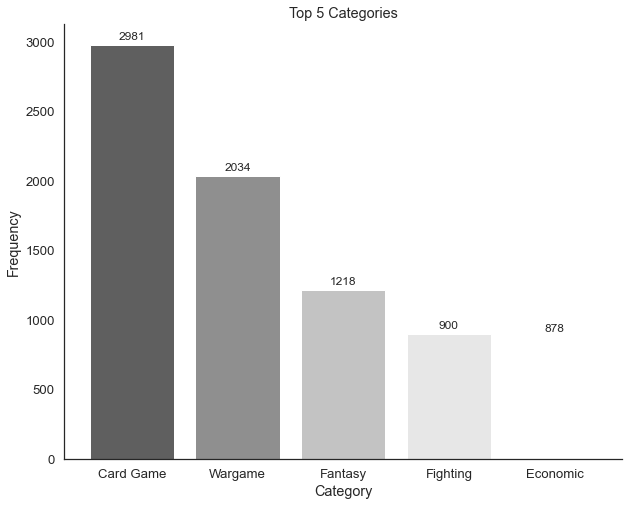

In [27]:
# Counting the frequency of each category in the dataframe
category_counts = df_top_categories['category'].value_counts().head(5)

# Creating a color map with bars fading from dark green to light green
colors = plt.cm.Greys_r(np.linspace(0.3, 1, len(category_counts)))

# Creating the bar plot
fig, ax = plt.subplots()
rects = ax.bar(category_counts.index, category_counts.values, color=colors)

# Adding the values on top of each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), 
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=12)

# Customizing the plot
ax.set_title('Top 5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display graph
plt.show()

As displayed above, these are the most frequent categories found in each row after applying Method 1. It's possible to see that card games, even if they're not only card games, but included in their group category are the most common. Probably because most of the games use sorts of cards in the games to describe characters, equipment, spells, properties, rules and much more. Which gave the "victory" to the card game category.

## Method 2 - value_counts

In this method will be used as just a simple process of counting the number of times the repeated categories encountered in the feature "category". Without splitting or applying any other method. In other words, taking each game as a whole and putting them all together with the exact same categories as they belong to.

In [28]:
# Calling the method describe
df['category'].describe

<bound method NDFrame.describe of 0                      [Economic, Negotiation, Political]
1                                    [Card Game, Fantasy]
2                           [Abstract Strategy, Medieval]
3                                               [Ancient]
4                                              [Economic]
                               ...                       
10527                              [Vietnam War, Wargame]
10528    [Card Game, Fantasy, Fighting, Video Game Theme]
10529                                         [Card Game]
10530               [Miniatures, Racing, Science Fiction]
10531                          [Card Game, City Building]
Name: category, Length: 10532, dtype: object>

In [29]:
# Counting frequency of each category in the feature "category" and selectig the top 5
distribution = df['category'].value_counts().head(5)

# Printing the distribution
print(distribution)

[Wargame, World War II]    449
[Card Game]                438
[Abstract Strategy]        284
[Napoleonic, Wargame]      124
[Economic]                 116
Name: category, dtype: int64


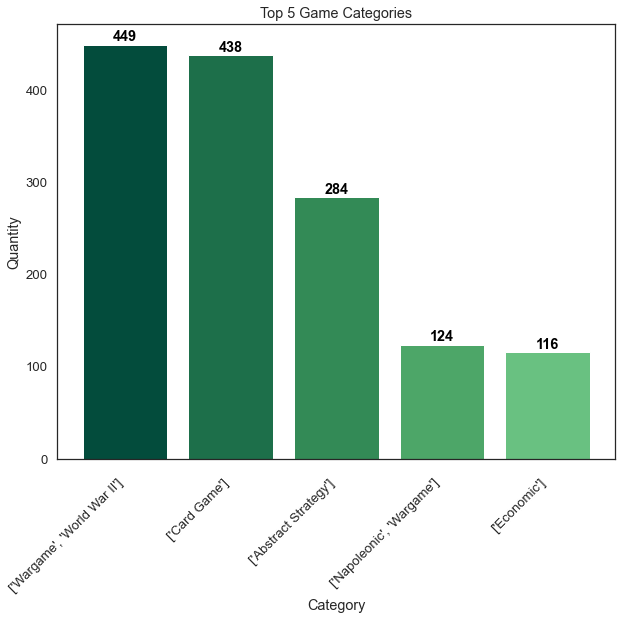

In [30]:
# Geting the frequency of the top 5 categories
distribution = df['category'].value_counts().head(5)

# Converting the list of categories to a sequence of strings
categories_str = list(map(str, distribution.index))

# Creating a matplotlib figure
fig, ax = plt.subplots()

# Creating the bar chart with the top 5 categories
ax.bar(categories_str, distribution.values, color=['#034c3c', '#1d6f4a', '#338a56', '#4da668', '#69c181'])

# Setting the title and axis labels
ax.set_title('Top 5 Game Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Quantity')

# Setting tick params to center x-axis labels
ax.tick_params(axis='x', pad=12)

# Adding a label with the value for each bar
for i, v in enumerate(distribution.values):
    ax.text(i, v+0.5, str(v), color='black', fontweight='bold', ha='center', va='bottom')
    
# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Display graph
plt.show()

The barplot above shows how much each board game has in those most repeated categories considering them all as a whole. It's still possible to see that cardgames are remaining in the top most presents and it also shows how present and important the cards are for a playing structure of a board game. Likewise, Wargames and World War II remain in the top 5 of the most played categories among the users.

<a id='q4'></a>
# QUESTION 4
## DO OLDER GAMES (1992 AND EARLIER) HAVE A HIGHER MEAN “AVERAGE RATING” THAN NEWER GAMES (AFTER 1992)?

This question might be a little unfair due to the fact that comparing the average rating of games before 1992 since the technology was smaller, the number of games published until then was significantly smaller and also the access of users to these games was more limited as the internet has facilitated any and all purchases or product reviews online. The first determining factor before analyzing the mean of each category of games would be to understand the proportion of games released before and after 1992 and understand how discrepant the amount released is.

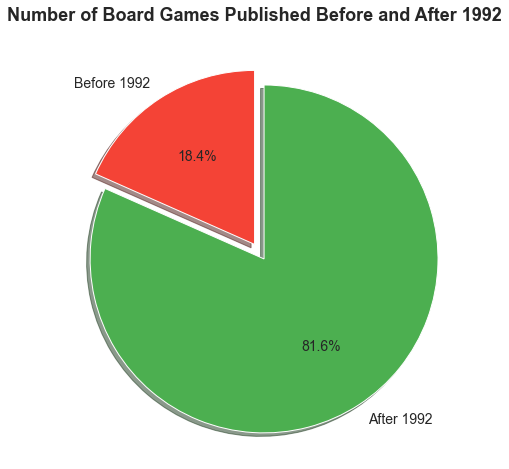

In [31]:
# Creating a subset of the data for games published before and after 1992
df_before_1992 = df[df["year_published"] <= 1992]
df_after_1992 = df[df["year_published"] > 1992]

# Getting the number of games published before and after 1992
num_before_1992 = len(df_before_1992)
num_after_1992 = len(df_after_1992)

# Creating a pie chart
labels = ["Before 1992", "After 1992"]
sizes = [num_before_1992, num_after_1992]
colors = ["#F44336", "#4CAF50"]
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})

# Adding a title
ax.set_title("Number of Board Games Published Before and After 1992", fontsize=18, fontweight='bold')

# Display graph
plt.show()

From the data presented in the pie chart above, it is already possible to have an idea of the contrast of quantitative values of games released on the listed dates. From now on, the following codes will separate games by their release dates (before or after 1992) and extract the mean result of each one.

In [32]:
# Getting the mean of the games published before and after 1992
mean_before_1992 = df.loc[df['year_published'] <= 1992, 'average_rating'].mean()
mean_after_1992 = df.loc[df['year_published'] >1992, 'average_rating'].mean()

# Printing the mean results
print(f'The mean of the games released after before 1992 is : {mean_before_1992}')
print(f'The mean of the games released after before 1992 is : {mean_after_1992}')

The mean of the games released after before 1992 is : 6.035236628748702
The mean of the games released after before 1992 is : 6.44634885322168


In [33]:
# Creating the function condition to get the higher mean
if mean_before_1992 > mean_after_1992:
    print ('The mean of the average rating of the games published before 1992 is higher than the games published after 1992')

else:
    print ('The mean of the average rating of the games published after 1992 is higher than the games published before 1992')

The mean of the average rating of the games published after 1992 is higher than the games published before 1992


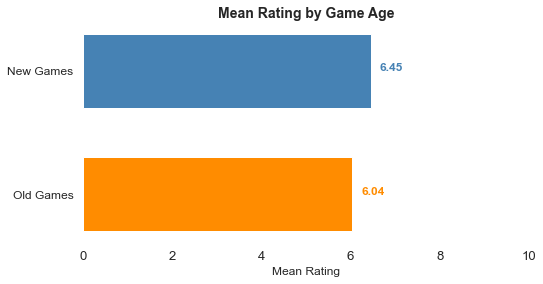

In [34]:
# Separating the games into two groups: old games and recent games
older_games = df[df['year_published'] <= 1992]
newer_games = df[df['year_published'] > 1992]

# Calculating the mean rating for each group
older_mean = older_games['average_rating'].mean()
newer_mean = newer_games['average_rating'].mean()

# Defining colours for each group
colors = ['darkorange', 'steelblue']

# Creating a grouped horizontal bar chart with the mean ratings
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh([0, 1], [older_mean, newer_mean], color=colors, height=0.6)

# Adding labels and titles to the chart
ax.set_yticks([0, 1])
ax.set_yticklabels(['Old Games', 'New Games'], fontsize=12)
ax.set_xlim([0, 10])
ax.set_xlabel('Mean Rating', fontsize=12)
ax.set_title('Mean Rating by Game Age', fontsize=14, fontweight='bold')

# Adding mean values above each bar
for i, v in enumerate([older_mean, newer_mean]):
    ax.text(v + 0.2, i, str(round(v, 2)), color=colors[i], fontsize=12, fontweight='bold')

# Removing chart borders
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Display graph
plt.show()

After performing the analysis and plotting the barplot, it was possible to verify that the approval average between the games did not change in a surprising way. This may have been due to the fact that the large-scale release of new games from 1992 onwards increased the likelihood of higher ratings but also the possibility of many more low-quality games for users, and this may have led to pulling mean. from the average rating further down.

Next, it will be possible to see some boxplots and violinplot to better understand the distribution of this average rating of users.

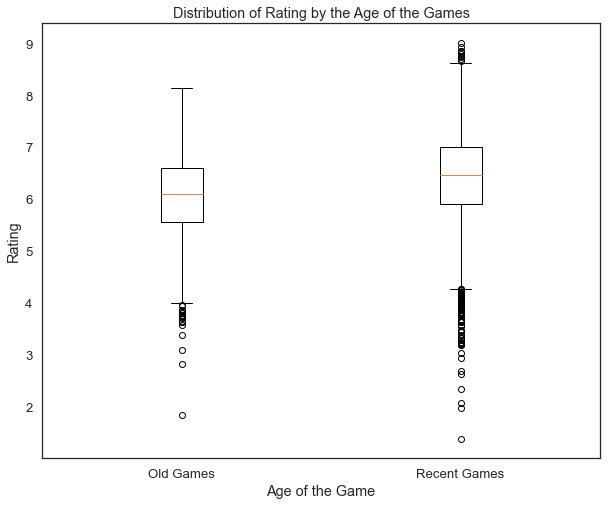

In [35]:
# Separating the games in two groups: Old Games and Recent Games
older_games = df[df['year_published'] <= 1992]
newer_games = df[df['year_published'] > 1992]

# Creating a boxplot with the rating of every group's distributionia
data = [older_games['average_rating'], newer_games['average_rating']]
labels = ['Old Games', 'Recent Games']
plt.boxplot(data, labels=labels)
plt.title('Distribution of Rating by the Age of the Games')
plt.xlabel('Age of the Game')
plt.ylabel('Rating')
plt.show()

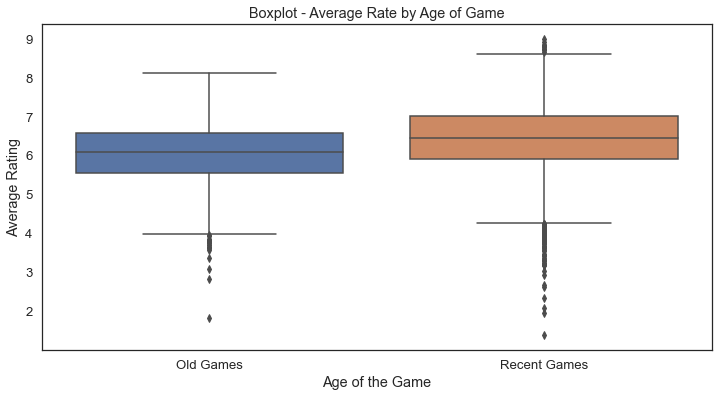

In [36]:
# Separating games in two groups: Old Games and Recent Games
older_games = df[df['year_published'] <= 1992]
newer_games = df[df['year_published'] > 1992]

# Creating a subplot with 1 line and 2 columns
fig, axs = plt.subplots(ncols=1, figsize=(12,6))

# Creating the boxplot
sns.boxplot(x='group', y='average_rating', data=pd.concat([older_games.assign(group='Old Games'), newer_games.assign(group='Recent Games')]), ax=axs)
axs.set_title('Boxplot - Average Rate by Age of Game')
axs.set_xlabel('Age of the Game')
axs.set_ylabel('Average Rating')

# Display graph
plt.show()

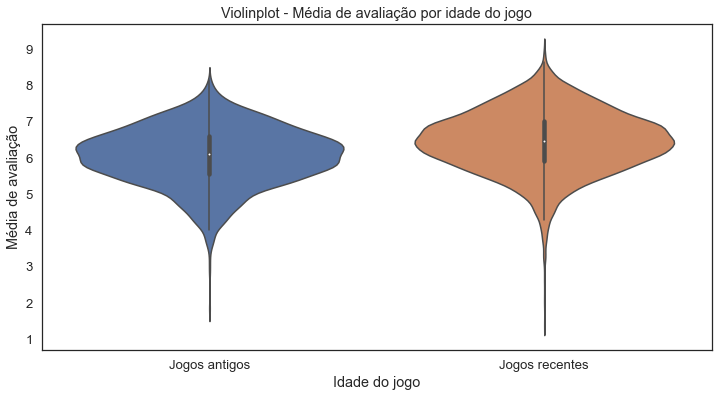

In [37]:
# Creating a subplot with 1 line and 2 columns
fig, axs = plt.subplots(ncols=1, figsize=(12,6))

# Creating the violinplot
sns.violinplot(x='group', y='average_rating', data=pd.concat([older_games.assign(group='Jogos antigos'), newer_games.assign(group='Jogos recentes')]), ax=axs)
axs.set_title('Violinplot - Média de avaliação por idade do jogo')
axs.set_xlabel('Idade do jogo')
axs.set_ylabel('Média de avaliação')

# Display graph
plt.show()

The Boxplot and Violin Plot are always great options for visualizing the distribution of values in their respective variables. After a not necessarily very deep analysis, it was already possible to verify that despite the difference in rating by users being very negligible, the highest concentration of scores is between 4 and 8 with a greater volume between 5 and 7. This means that the average rate in the vast majority of games was above its 50% acceptance regardless of its release date.

<a id='q5'></a>
# QUESTION 5
## WHAT ARE THE 3 MOST COMMON “MECHANICS” IN THE DATASET?  

As it was done previously in [Question 3](#q3). The process used to analyse this question will be the same. On one side, there is feature mechanics where many variables consist of 2 or more different types of mechanics. On the other hand, in a different perception, there is the raw "mechanics" feature ready to be analysed as it is, each game with its own mechanics, what makes a boardgame be what it is.
In the following code lines, it will be possible to see two different structures of analysis. The Method 1, where the method lambda / str.split / explode, will be used again to separate all these mechanics and display on the pie chart, showing the quantity separately, and Method 2 where the rows are going to be analysed with the method value_counts, not affecting the feature structure of the original dataset.

## Metod 1 - lambda / str.split / explode


In [38]:
# Spliting the signal of the words in the features' rows
df['mechanic'] = df['mechanic'].apply(lambda x: str(x))
df['mechanic'] = df['mechanic'].str.split('[,|/]').apply(lambda x: [i.strip() for i in x if isinstance(i, str)])

In [39]:
# Creating a line for all mechanics
mechanics_list = [cat for cat_list in df['mechanic'] for cat in cat_list]

# Counting frequency of each mechanic
mechanics_count = Counter(mechanics_list)

# Selecting the top 5 mechanics
top_mechanics = [cat[0] for cat in mechanics_count.most_common(3)]

# Creating a new dataframe containing the lines with the top 5 mechanics
df_top_mechanics = df[df['mechanic'].apply(lambda x: any(cat in x for cat in top_mechanics))]

# Converting all lists of the feature "mechanic" in strings, without brackets and quotes
df_top_mechanics.loc[:, 'mechanic'] = df_top_mechanics['mechanic'].apply(lambda x: [cat.strip('[]"\'') for cat in x])

# Creating a new line to each mechanic of each game
df_top_mechanics = df_top_mechanics.explode('mechanic')

# Calling df to check if worked
df_top_mechanics

game_id                                        description  \
0            1  Die Macher is a game about seven sequential po...   
0            1  Die Macher is a game about seven sequential po...   
0            1  Die Macher is a game about seven sequential po...   
0            1  Die Macher is a game about seven sequential po...   
0            1  Die Macher is a game about seven sequential po...   
...        ...                                                ...   
10528   215437  Codex: Card-Time Strategy is a customizable, n...   
10529   215471  Time to walk about town and take some pictures...   
10529   215471  Time to walk about town and take some pictures...   
10531   216725  The deluxe edition comes in a double tall box ...   
10531   216725  The deluxe edition comes in a double tall box ...   

                                              image  max_players  \
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
0       //cf.geekdo-images.com/images/pic159509.jpg            5   
...                                             ...          ...   
10528  //cf.geekdo-images.com/images/pic3290122.jpg            5   
10529  //cf.geekdo-images.com/images/pic3290975.png            4   
10529  //cf.geekdo-images.com/images/pic3290975.png            4   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   
10531  //cf.geekdo-images.com/images/pic3308211.jpg            5   

       max_playtime  min_age  min_players  min_playtime  \
0               240       14            3           240   
0               240       14            3           240   
0               240       14            3           240   
0               240       14            3           240   
0               240       14            3           240   
...             ...      ...          ...           ...   
10528            45       13            2            45   
10529            20       12            2            20   
10529            20       12            2            20   
10531            60       14            1            30   
10531            60       14            1            30   

                                                  name  playing_time  ...  \
0                                           Die Macher           240  ...   
0                                           Die Macher           240  ...   
0                                           Die Macher           240  ...   
0                                           Die Macher           240  ...   
0                                           Die Macher           240  ...   
...                                                ...           ...  ...   
10528             Codex: Card-Time Strategy – Core Set            45  ...   
10529                                   Wind the Film!            20  ...   
10529                                   Wind the Film!            20  ...   
10531  Villages of Valeria: Deluxe Kickstarter Edition            60  ...   
10531  Villages of Valeria: Deluxe Kickstarter Edition            60  ...   

                                               category  \
0                    [Economic, Negotiation, Political]   
0                    [Economic, Negotiation, Political]   
0                    [Economic, Negotiation, Political]   
0                    [Economic, Negotiation, Political]   
0                    [Economic, Negotiation, Political]   
...                                                 ...   
10528  [Card Game, Fantasy, Fighting, Video Game Theme]   
10529                                       [Card Game]   
10529                                       [Card Game]   
10531                        [Card Game, City Building]   
10531                        [Card Game, City Building]   

                  

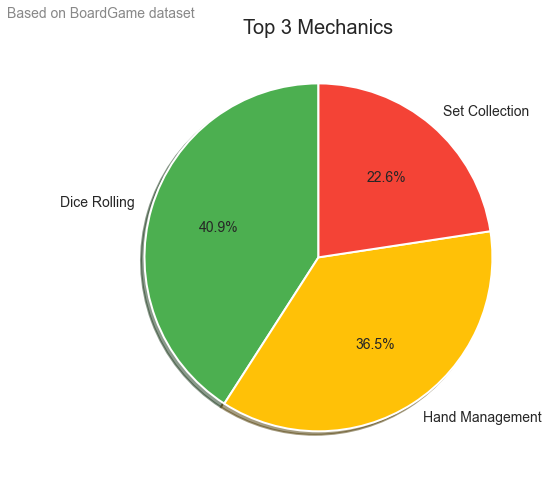

In [40]:
# Counting the frequency of each category in the dataframe
mechanic_counts = df_top_mechanics['mechanic'].value_counts().head(3)

# Defining the labels and colours for the pie chart
labels = mechanic_counts.index
colors = ['#4CAF50', '#FFC107', '#F44336']#'#2196F3']

# Defining the wedgeprops parameter for a better look
wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

# Creating the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(mechanic_counts.values, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops={'fontsize': 14},
       wedgeprops=wedgeprops)

# Adding a title and subtitle
ax.set_title('Top 3 Mechanics', fontsize=20)
ax.text(0, 1.05, 'Based on BoardGame dataset', transform=ax.transAxes,
        ha='center', fontsize=14, color='#888888')

# Removing the y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', which='both', length=0)

# Display graph
plt.show()

As it's possible to notice. The Method 1 created approximately 7000 more rows than the original dataset due to the new rows with single mechanics for each. The mechanic type Dice Rolling is the most common according to this dataset, independently of what other types of the boardgames in cases are. Separately, it shows the types respectively the types:

- 1st - Dice Rolling = 40,9%
- 2nd - Hand Management = 36,5%
- 3rd - Set Collection = 22,6%

## Method 2 - value_counts

In [41]:
# Overviewing the feature "mechanic" 
df['mechanic']

0        [Area Control, Area Influence, Auction, Biddin...
1                                           [Trick-taking]
2        [Area Control, Area Influence, Hand Management...
3        [Action Point Allowance System, Area Control, ...
4         [Hand Management, Stock Holding, Tile Placement]
                               ...                        
10527                                    [Hex-and-Counter]
10528    [Deck, Pool Building, Hand Management, Variabl...
10529                    [Hand Management, Set Collection]
10530    [Action, Movement Programming, Grid Movement, ...
10531                     [Card Drafting, Hand Management]
Name: mechanic, Length: 10532, dtype: object

In [42]:
# Counting the top 4 more frequent
frequency = df['mechanic'].value_counts().head(4)

# Printing the frequency
print(frequency)

[nan]                950
[Hex-and-Counter]    523
[Hand Management]    297
[Dice Rolling]       222
Name: mechanic, dtype: int64


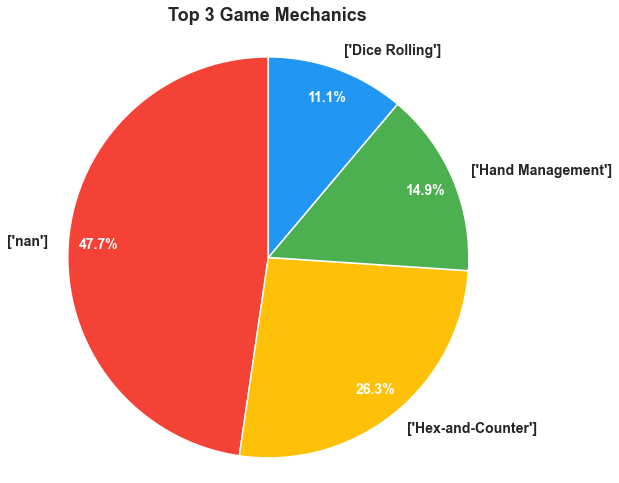

In [43]:
# Defining graph parameters
labels = frequency.index[:4]
sizes = frequency.values[:4]
colors = ['#F44336', '#FFC107', '#4CAF50', '#2196F3']

# Creating the pie chart and its axes
fig, ax = plt.subplots(figsize=(8, 8))

# Creating the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
                                  wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, 
                                  textprops={'fontsize': 14, 'fontweight': 'bold'}, pctdistance=0.85)

# Customizing the text colours inside the slices
for autotext in autotexts:
    autotext.set_color('white')

# Customizing the size of the subtitles
for text in texts:
    text.set_fontsize(14)

# Adding the graph titles
ax.set_title('Top 3 Game Mechanics', fontsize=18, fontweight='bold', pad=20)

# Removing the axes coordinates
ax.axis('equal')
ax.axis('off')

# Display graph
plt.show()

The choice of the pie chart for this question was selected due to being an easy and popularly common way to interpret the results of the analysis. The colours were selected as basic colours to make them contrast with each other and turn the visualization into a simple task even for someone who has never faced a numerical distribution before.

The pie chart above shows a high percentage of missing values (NaN). This is due to the missing data from the original dataset. In the Method 2 there was no alteration in the "mechanic" feature. Due to that, 4 values were requested so the percentage of NaN could be skipped, turning the analysis focused only on those 3 features left. Although, in this second analysing process is also possible to spot a new mechanic type which came to the top frequency other than Hand Management and Dice Rolling. Hex-and-Counter appears to be the 1st most frequent among the board games published. However, the remaining mechanics are still in the top 3, only changing their position. At this time, Dice Rolling occupies the 3rd position instead of 1st and Hand Management is still taking holding the 2nd spot. Therefore their sequence is respectively:

- 1st Hex-and-Counter = 26,3%
- 2nd Hand Management = 14,9%
- 3rd Dice Rolling = 11,1%

Reminding the 1st position of the Pie Chart (NaN) is being ignored as it has no significant meaning for this analysis. It is probably derivated from a lack of information about the games and this gap can't be filled up with any other information, otherwise, it would be displaying completely wrong details about those games selected. For this reason, they're not included in the percentage (%) of this process.

<a id='q6'></a>
# QUESTION 6
## WHAT INSIGHTS CAN WE HAVE FROM THE CORRELATION BETWEEN THE YEAR OF PUBLISHMENT AND AVARAGE RATING?

This question can be significant to the company's future sales because it helps to comprehend what the users' choices are related to the year of publishment. For example, if the analysis process shows that recent games are scored with a higher rate, it can indicate that users are looking for modern game styles. On the hand, if the analysis presents that old games tend to gain a higher score, it indicates that there's still a hot market for old and classic board game styles.
Understing better the consumers' relation with the different games' years of publishment, the company can concentrate their points of interest on their customers and leverage future sales. The analysis below will follow a few steps, followed by the visualization and description of the cells ahead.

- Heatmap: The use of the heatmap will support visualizing how correlated these 2 features are with each other and how this. This is a basic step to initiate any process of features correlation and to help the decisions, the heatmap will be used with the method Matplotlib, which is a common and easy tool for data visualization.

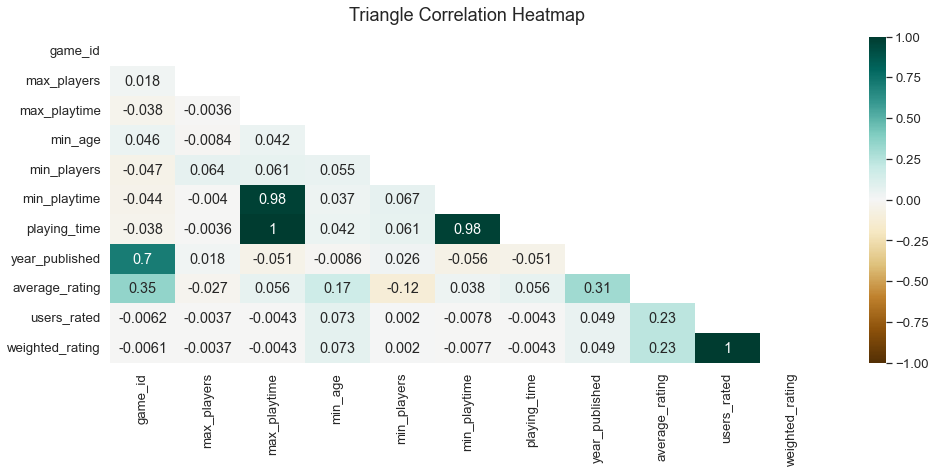

In [44]:
# Plotting the Triangle Correlation Map
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(method = "pearson")))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

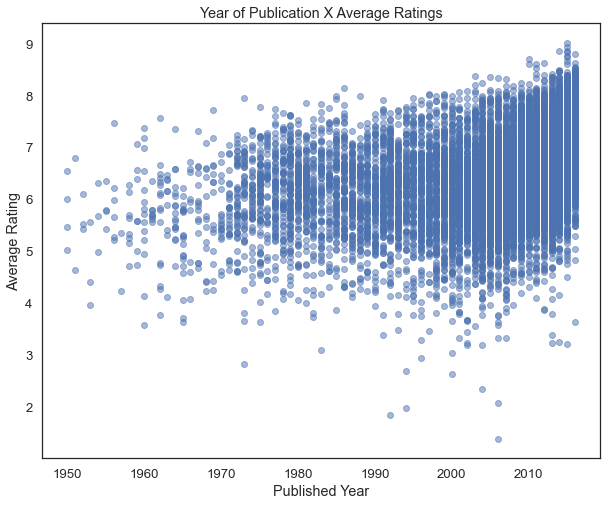

In [45]:
# Creating the graph
plt.scatter(df['year_published'], df['average_rating'], alpha=0.5)

# Adding the labels
plt.title('Year of Publication X Average Ratings')
plt.xlabel('Published Year')
plt.ylabel('Average Rating')

# Display graph
plt.show()

- Scatter Plot: Although often used for clustering, the graph above used the scatter plot for its ease of making the visualization of the scale of the rating score through the years given by the users. Each point on the plot represents a different game. It's notorious how spread out the rating spots are and how they did increase over those years, especially from the 70s. However, only from this graph displayed won't be possible to check how the rating line behaves over these years.

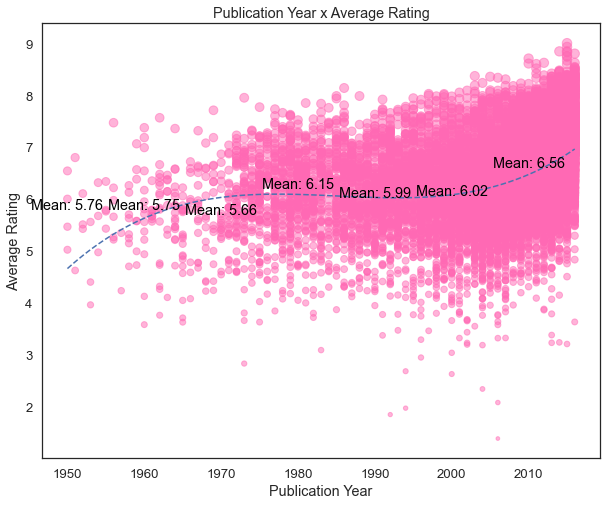

In [46]:
# Adjusting the size of the graph
plt.figure(figsize=(10, 8))

# Creating a bubble plot
plt.scatter(df['year_published'], df['average_rating'], s=df['average_rating']*10, c='hotpink', alpha=0.5)

# Adding tittles and labels
plt.title('Publication Year x Average Rating')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')

# Calculating the polynomial regression curve
z = np.polyfit(df['year_published'], df['average_rating'], 3)
p = np.poly1d(z)

# Plotting the polynomial regression curve
xp = np.linspace(df['year_published'].min(), df['year_published'].max(), 100)
plt.plot(xp, p(xp), 'b--')

# Calculating the mean of each 10 years and adding the label
for year in range(df['year_published'].min(), df['year_published'].max() + 1, 10):
    mean_volume = df.loc[df['year_published'] == year, 'average_rating'].mean()
    plt.text(year, mean_volume + 0.05, f'Mean: {mean_volume:.2f}', color='black', ha='center')

# Display graph
plt.show()

According to the scatter plot above, the distribution it's still the same, however, the colour pink was chosen for making possible to see the mean line represented by the blue colour along the distribution and demonstrate the increase of positive ratings for the games published from the 90s. This could be for the popularity of the entertainment category of games and mainly for technology. The fact of the internet became a common and accessible acquisition in 1995 according to the article from [Science and Media Museum](https://www.scienceandmediamuseum.org.uk/objects-and-stories/short-history-internet), this was a determinant factor for making possible access to online shopping and researches about boardgames or interest subjects.

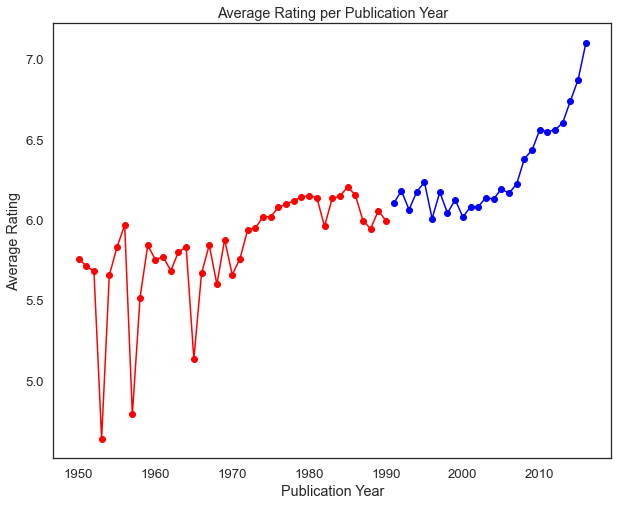

In [47]:
# Calculating the mean for each year
mean_by_year = df.groupby('year_published')['average_rating'].mean()

# Creating the line plot
plt.plot(mean_by_year[mean_by_year.index <= 1990].index, mean_by_year[mean_by_year.index <= 1990].values, '-o', color='red')
plt.plot(mean_by_year[mean_by_year.index > 1990].index, mean_by_year[mean_by_year.index > 1990].values, '-o', color='blue')

# Adding tittles and labels
plt.title('Average Rating per Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')

# Display graph
plt.show()

The line graph above makes in contrasting red and blue colours demonstrates more accurately the line of the mean in a shorter scale with discrepant colours to split the rate mean by the year of publication of the games and see how it increases in the 90s. The scale is shorter and might make people think that is not significant, but this represents nearly 2 points in the maximum score, moving up from 5.76 average scores to 6.56, representing an increase of approximately 20% in acceptance for newer games by the users.

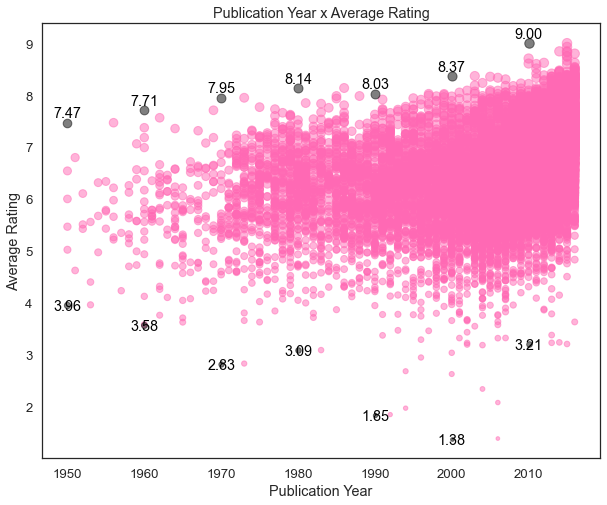

In [48]:
# Creating a dataframe with the details for every decade
df_decades = df.groupby(df['year_published']//10*10).agg({'average_rating': ['mean', 'max', 'min']})
df_decades.columns = ['_'.join(col) for col in df_decades.columns]
df_decades.reset_index(inplace=True)

# Adjusting the size of the plot
plt.figure(figsize=(10, 8))

# Creating a bubble plot
plt.scatter(df['year_published'], df['average_rating'], s=df['average_rating']*10, c='hotpink', alpha=0.5)

# Adding tittles and labels
plt.title('Publication Year x Average Rating')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')

# Adding blue bubbles with maximum values and labels with minumum values
for index, row in df_decades.iterrows():
    plt.scatter(row['year_published'], row['average_rating_max'], s=row['average_rating_max']*10, c='black', alpha=0.5)
    plt.text(row['year_published'], row['average_rating_max'] + 0.1, f'{row["average_rating_max"]:.2f}', color='black', ha='center')
    plt.scatter(row['year_published'], row['average_rating_min'], s=row['average_rating_min']*10, c='black', alpha=0.5)
    plt.text(row['year_published'], row['average_rating_min'] - 0.1, f'{row["average_rating_min"]:.2f}', color='black', ha='center')


# Display graph
plt.show()

The scatter above basically follows the same structure as the previous pink scatter, however differently this time, the proposal is to spot the peaks of rating scores given by the users over those 60 years. As it seems, there is an ascendant peak from 1950 to 2010, flowing from 7.47 to 9 points, which is impressive. However, it's impossible to go through this analysis without noticing as well the dropping rate from the beginning to the year 2000. This could have been caused by the boom of the internet and the publishment from 1992 as shown in the first pie chart displayed in [Question 4](#q4). The excess of publishment can have caused also the drop in the quality of boardgames as it seemed to have turned into a trend at that time.

## Conclusion (Question 6)

Based on this analysis, modern board games are still a preference among users. This can be attributed due the diversification available on the market, offering a wide variety, of mechanics and game styles. However, this doesn't mean that old games lost their relevance, as many of them are still being played and updated with expansions, causing their sales to be alive still.

<a id='q7'></a>
# QUESTION 7
## WHAT INSIGHTS CAN WE GET BY ANALYSING THE MAX PLAYTIME E AVERAGE RATING?

Analysing the maximum playtime of a game and the average rating will make it possible to obtain meaningful insights about what users prefer in terms of game duration and the quality of the respective. Find out if the game duration will impact directly or indirectly how the users rate it. This type of information will be extremely useful for the company helping them to take a strategic decision in the development of the games like the next marketing steps, improvement of the games already published like updates and expansions, focusing on the adequate target consumers.

For this analysis, a few steps will be taken to visualize the data, making the possibility for a future decision clear based on the structure of facts given by the dataset.

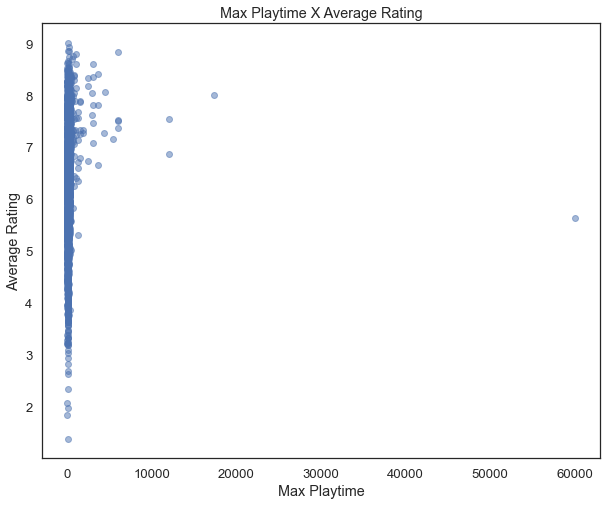

In [49]:
# Creating the graph
plt.scatter(df['max_playtime'], df['average_rating'], alpha=0.5)

# Adding the labels
plt.title('Max Playtime X Average Rating')
plt.xlabel('Max Playtime')
plt.ylabel('Average Rating')

# Display graph
plt.show()

- Scatter plot: To verify how the data behaves a scatter plot was displayed. It helps the see how the data is spread out all over the board and understand the scenario of how the game duration impacts or not the average rating of it.

As seen above, every blue point represents a game on the dataset. It's possible to notice a few outliers on it and that's why a previous analysis of playtime was made in the topic [Dealing With Outliers](#dealing-with-outliers). The scale of the rating game goes from 1 to 9 and the max playtime is from 0 to 60000.
An interesting and curious fact is to observe how long a game was played according to the scatter plot analysis shown by the last blue point on the right. These outliers are explained and displayed in the following cell.

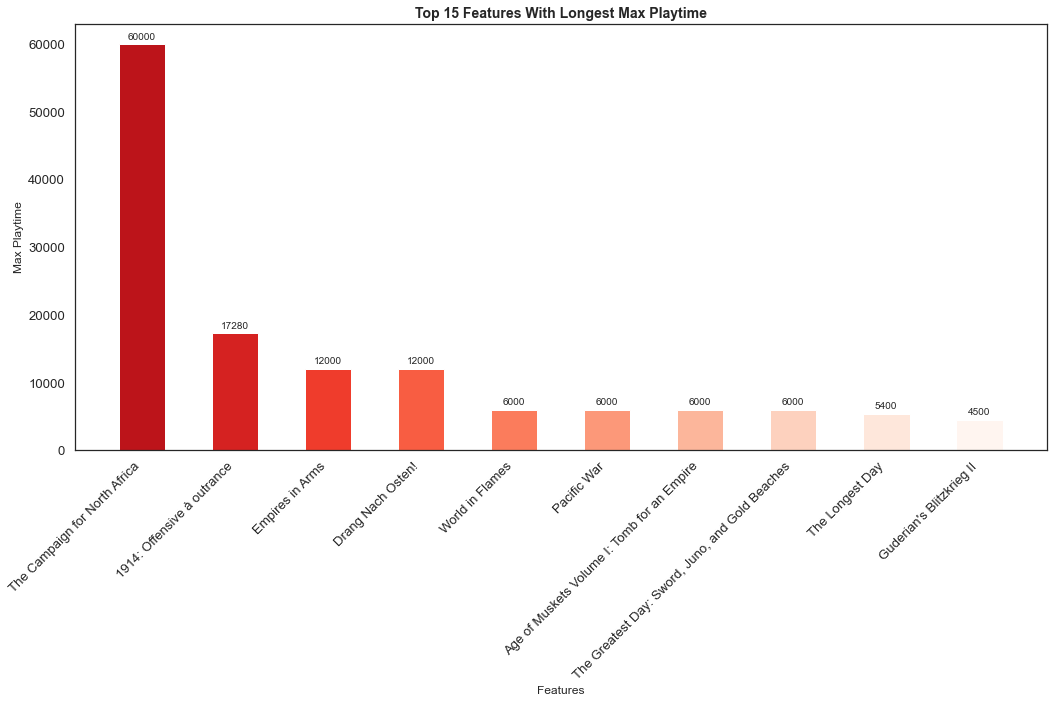

In [50]:
# Selecting top 5 values in the feature max_playtime
top_max_playtime = df.nlargest(10, 'max_playtime')

# Defining the colormap of the fading colours in red
cmap = plt.get_cmap('Reds_r')

# Creating a bar plot
fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(top_max_playtime['name'], top_max_playtime['max_playtime'], width=0.5, align='center',
              color=cmap(np.linspace(0.2, 1, len(top_max_playtime))))
plt.xticks(rotation=45, ha='right')

# Adjusting the graph setup
ax.set_title('Top 15 Features With Longest Max Playtime', fontsize=14, fontweight='bold')
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Max Playtime', fontsize=12)

# Adding values for each bar
for i, bar in enumerate(bars):
    ax.annotate(str(top_max_playtime.iloc[i]['max_playtime']), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Adjusting the graph position
plt.tight_layout()

# Display graph
plt.show()

Represented on the previous scatter plot, the first 4 games are easily noticed as far outliers from the group of minutes of the usual games.
As displayed on the bar plot above, 4 games are spotted as the longest games ever played. They are respectively:

- 1st The Campaign for North Africa - 60000 minutes = 1000h 
- 2nd 1914: Offensive a Outrance - 17280 minutes = 288h
- 3rd Empires in Arms - 12000 minutes = 200h
- 4th Drang Natch Osten! - 12000 minutes = 200h

However, according to the previous scatter plot displayed, none of them was able to reach the maximum score, lying on the very stable average between 6 and 8, which still is a good rate score.

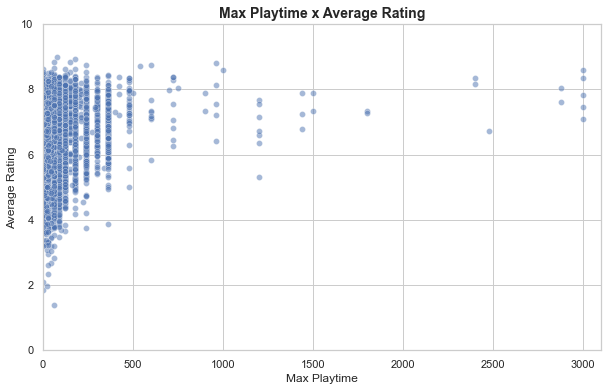

In [51]:
# Creating graph dispersion
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='max_playtime', y='average_rating', alpha=0.5, ax=ax)

# Adding titles and labels
ax.set_title('Max Playtime x Average Rating', fontsize=14, fontweight='bold')
ax.set_xlabel('Max Playtime', fontsize=12)
ax.set_ylabel('Average Rating', fontsize=12)

# Setting the scale
ax.set_xlim(0, 3100)
ax.set_ylim(0, 10)

# Display graph
plt.show()

The scatter plots above are just the same version of the first displayed at the beginning of this question but with a very reduced scale. The previous display cuts out all the visible range for the outliers and as soon as the code is run with a scale of 3100, it's possible to realize that the high concentration of the games is all inside the 500h of playtime.

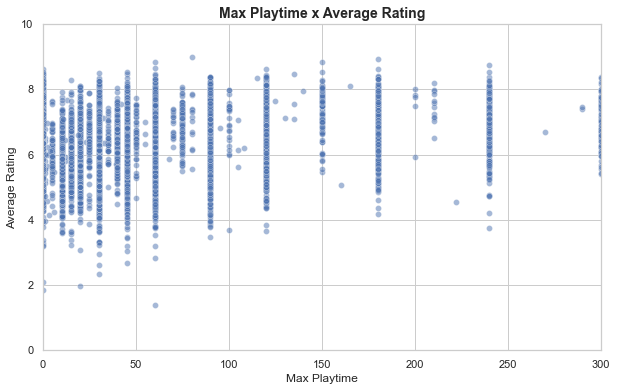

In [52]:
# Creating dispersion graph
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='max_playtime', y='average_rating', alpha=0.5, ax=ax)

# Adding titles and labels
ax.set_title('Max Playtime x Average Rating', fontsize=14, fontweight='bold')
ax.set_xlabel('Max Playtime', fontsize=12)
ax.set_ylabel('Average Rating', fontsize=12)

# Setting the scale
ax.set_xlim(0, 300)
ax.set_ylim(0, 10)

# Display graph
plt.show()

Zooming in once more, now with a smaller scale of 300h, it's possible to see that most of the games were played less than 100h and received an average score between 5 and 8.

## Conclusion - Question 7

Based on the analysis of the graphs of the correlation between the average rating and max playtime of the board games, it can be concluded that the playtime factor is not something decisive to determine if the game is good or not. This indicates that other characteristics like gameplay, quality of the components and compressibility have an important role in the users' satisfaction. Therefore, it might be interesting for the company to consider all these factors listed above when developing new games, instead of just increasing the duration of a game aiming to improve the users' rating. 

# REFERENCES

- acervolima.com. (n.d.). Como adicionar rótulos em um gráfico usando Python? – Acervo Lima. [online] Available at: https://acervolima.com/como-adicionar-rotulos-em-um-grafico-usando-python/ [Accessed 14 Apr. 2023].

- Alura. (n.d.). Curso Online Python para Data Science: linguagem e Numpy. [online] Available at: https://cursos.alura.com.br/course/python-tipos-listas-numpy [Accessed 14 Apr. 2023].

- BoardGameGeek. (n.d.). Catan. [online] Available at: https://boardgamegeek.com/boardgame/13/catan.

- Carvalho, T. (2021). Lollipop Charts with Python’s Matplotlib. [online] Star Gazers. Available at: https://medium.com/star-gazers/lollipop-charts-with-pythons-matplotlib-dbe9715c0840 [Accessed 14 Apr. 2023].

- Holtz, Y. (n.d.). Python Graph Gallery. [online] The Python Graph Gallery. Available at: https://www.python-graph-gallery.com/.

- matplotlib.org. (n.d.). Basic pie chart — Matplotlib 3.3.4 documentation. [online] Available at: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html.

- seaborn.pydata.org. (n.d.). seaborn.barplot — seaborn 0.11.1 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.barplot.html.

- Stack Overflow. (n.d.). matplotlib - Scatter plot and Color mapping in Python. [online] Available at: https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python.

- Stack Overflow. (n.d.). python - Improve subplot size/spacing with many subplots. [online] Available at: https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots [Accessed 14 Apr. 2023].

- We Are The Mighty. (2022). The longest board game ever made is based in WWII North Africa and takes 1,500 hours to finish. [online] Available at: https://www.wearethemighty.com/mighty-history/longest-board-game/ [Accessed 14 Apr. 2023].

‌





